In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy import stats

In the paper, we got theoretical values and their probabilities:

In [0]:
def plot_theoretical_distribution(n):
    v = (np.arange(0, n+1) - n/2) / np.sqrt(n)
    p = scipy.special.comb(n, np.arange(0, n+1)) / 2**n
    probabilities = plt.plot(v, p)
    plt.grid(True)
    plt.xlim((-2, 2))
    plt.title('Theoretical PDF for n = {}'.format(n))
    plt.xlabel(r'$\nu_n$')
    plt.ylabel(r'$P(\nu_n)$')
    return probabilities

Then, we want to check in the practice if this really happens. We express our distribution through the binomial minus a shift:
\begin{equation}
b_i = \begin{cases} 0, & \mbox{} \mbox{$p = \frac{1}{2}$} \\ 1, & \mbox{} \mbox{$p = \frac{1}{2}$} \end{cases}\\
\nu_n = \frac{\sum_{i=1}^{n} \eta_i}{\sqrt{n}} = \frac{\sum_{i=1}^{n} b_i - \frac{n}{2}}{\sqrt{n}}\\
E[\nu_n]= \sum_{i=1}^{n} \frac{E[\eta_n]}{\sqrt{n}} = 0\\
D[\nu_n]= D[\frac{\sum_{i=1}^{n}\eta_n}{\sqrt{n}}] = \frac{1}{n}
\sum_{i=1}^{n}D[\eta_i] = \frac{1}{4}\\
b_i \rightarrow Be(p)\\
\frac{\nu_n}{\sigma} \xrightarrow{n\to\infty} N(0,1) \\
\nu_n \xrightarrow{n\to\infty} N(0,\sigma^{2}) \\
\end{equation}

In [0]:
def plot_distribution(n, p=0.5, k=int(1e8)):
    result = (np.random.binomial(n, p, k) - n/2) / np.sqrt(n)
    values = np.unique(result)
    nu = (np.arange(0, n+2) - n/2 - 1/2) / np.sqrt(n)
    probabilities = plt.hist(result, bins=nu, weights=np.ones(k)/k)[0]
    plt.grid(True)
    plt.xlim((-2, 2))
    plt.title('Practical PDF for n = {}'.format(n))
    plt.xlabel(r'$\nu_n$')
    plt.ylabel(r'$P(\nu_n)$')
    return nu[:-1]+1/2/np.sqrt(n), probabilities

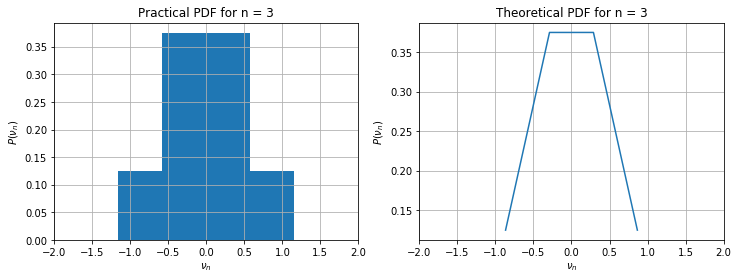

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plot_distribution(3)

plt.subplot(1, 2, 2)
plot_theoretical_distribution(3);

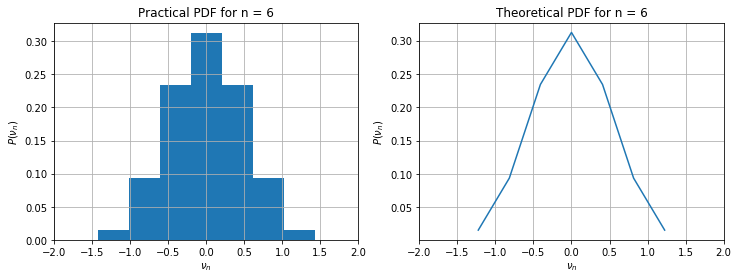

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plot_distribution(6)

plt.subplot(1, 2, 2)
plot_theoretical_distribution(6);

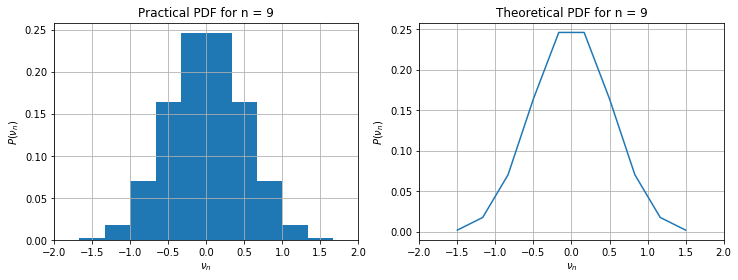

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plot_distribution(9)

plt.subplot(1, 2, 2)
plot_theoretical_distribution(9);

(array([-50.  , -49.99, -49.98, ...,  49.98,  49.99,  50.  ]),
 array([0., 0., 0., ..., 0., 0., 0.]))

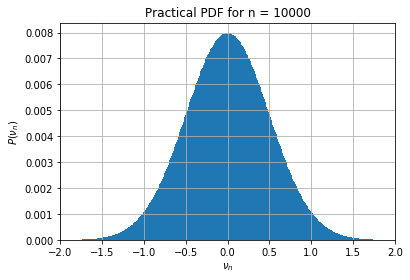

In [0]:
plot_distribution(10000)

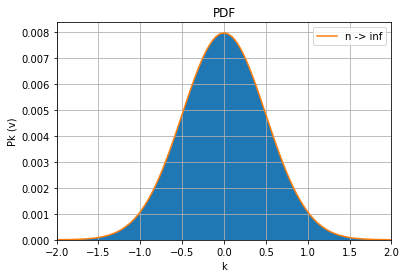

In [0]:
n = 10000
nu, probs = plot_distribution(n)

eps = 1e-3
xx = np.linspace(nu[0]-eps, nu[-1]+eps, n)
pp = stats.norm.pdf(xx, scale=0.5)
pp /= pp.sum()
plt.plot(xx, pp, label="n -> inf")

plt.grid(True)
plt.xlabel("k")
plt.ylabel("Pk (v)")
plt.title("PDF")
plt.legend()
plt.xlim((-2, 2))
plt.show();